# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras.backend as K # In keras backend refers to the computational engine executing operations and computations in deep learning
                          # models. The backend configuration determines which computational engine runs numeric expressions.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split

# Load in the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
x_train.dtype

dtype('uint8')

# Extract first 10000 samples

In [ ]:
X  = x_train[0:10000, :]

In [ ]:
X.shape # N x T x D

(10000, 28, 28)

In [ ]:
y = y_train[0:10000]

In [ ]:
y.shape

(10000,)

# Perform Train test split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [ ]:
train_data[0].shape  # shape of the first sample of train_data

(28, 28)

# Create the Model

In [ ]:
# input is an image of size 28x28

input = Input(shape=(train_data[0].shape))

# First bidirectional LSTM ( up-down )

Bi_LSTM_01 = Bidirectional(LSTM(128, return_sequences=True)) # return_sequences=True so that we get all the hidden states
X1 = Bi_LSTM_01(input) # output is N x D x 2H
X1 = GlobalMaxPooling1D()(X1) # output is N x 2H

# Second bidirectional LSTM ( left-right )

Bi_LSTM_02 = Bidirectional(LSTM(128, return_sequences=True))

# We need to create permute layer to switch the dimensions of T x D

permuteLayer = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

X2 = permuteLayer(input)
X2 = Bi_LSTM_02(X2) # output is N x D x 2H
X2 = GlobalMaxPooling1D()(X2) # output is N x 2H

# Concatenate both flatten outputs

concatenationLayer = Concatenate(axis=1)
X = concatenationLayer([X1, X2]) # output is N x 4H

# final dense layer
output = Dense(10, activation='softmax')(X) # N x C

model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 lambda (Lambda)             (None, 28, 28)               0         ['input_1[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 28, 256)              160768    ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 28, 256)              160768    ['lambda[0][0]']          

# Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 50)

Epoch 1/50
282/282 [==============================] - 56s 166ms/step - loss: 0.6862 - accuracy: 0.8246 - val_loss: 0.2477 - val_accuracy: 0.9360
Epoch 2/50
282/282 [==============================] - 44s 157ms/step - loss: 0.1951 - accuracy: 0.9509 - val_loss: 0.1726 - val_accuracy: 0.9540
Epoch 3/50
282/282 [==============================] - 43s 153ms/step - loss: 0.1224 - accuracy: 0.9701 - val_loss: 0.1329 - val_accuracy: 0.9660
Epoch 4/50
282/282 [==============================] - 43s 152ms/step - loss: 0.0925 - accuracy: 0.9756 - val_loss: 0.1409 - val_accuracy: 0.9610
Epoch 5/50
282/282 [==============================] - 45s 159ms/step - loss: 0.0788 - accuracy: 0.9783 - val_loss: 0.1334 - val_accuracy: 0.9590
Epoch 6/50
282/282 [==============================] - 42s 150ms/step - loss: 0.0744 - accuracy: 0.9792 - val_loss: 0.1198 - val_accuracy: 0.9700
Epoch 7/50
282/282 [==============================] - 42s 151ms/step - loss: 0.0580 - accuracy: 0.9859 - val_loss: 0.1112 - val_ac

# Visualize the Model Performance

In [ ]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

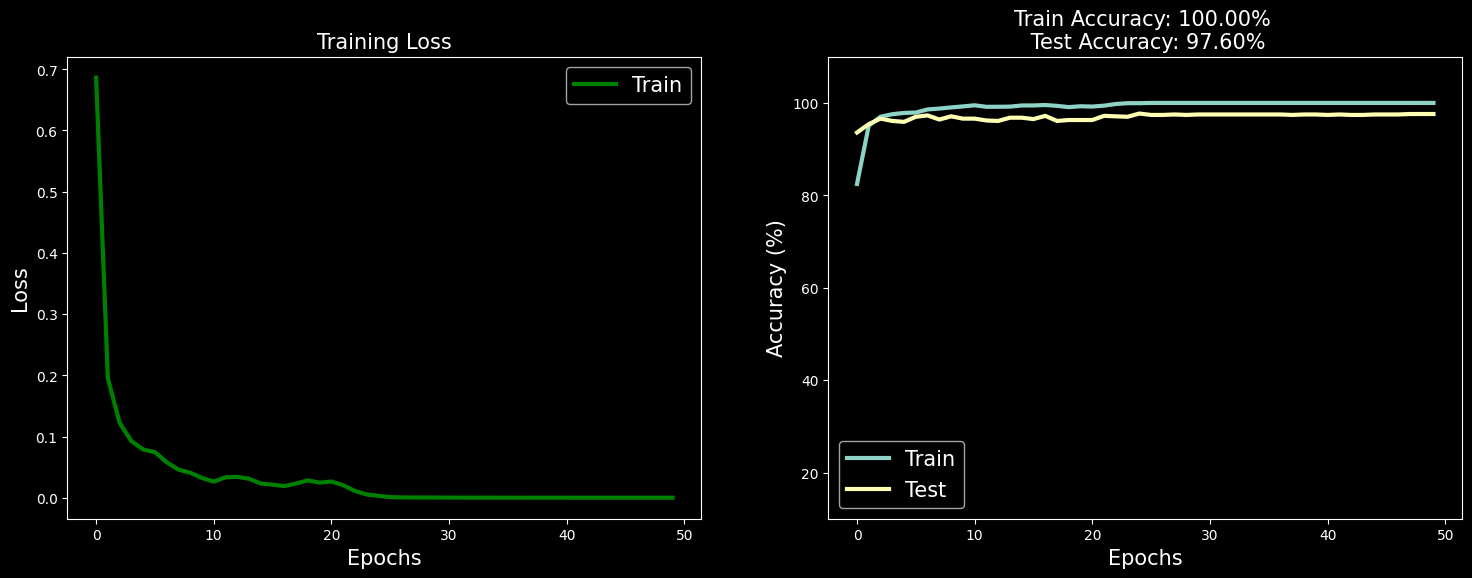

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

# Creating Function Using Lambda

In [ ]:
square = lambda num: num ** 2   # we use lamda when we need quick results and we dont want to save it for longer time

In [ ]:
square(6)

36

# Understanding PermuteLayer

In [ ]:
x = np.random.rand(32, 28, 10)

In [ ]:
permuteLayer = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

In [ ]:
output = permuteLayer(x)

In [ ]:
output.shape

TensorShape([32, 10, 28])